## 1. 统计学习方法概论 ##

例1.1 (11页)  用多项式去拟合  最小二乘法

## 最小二乘法 ##

In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq   #最小二乘法函数
#leastsq(func, x0, args=(), Dfun=None, full_output=0, col_deriv=0, ftol=1.49012e-08, xtol=1.49012e-08, gtol=0.0, maxfev=0, epsfcn=0.0, factor=100, diag=None, warning=True)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#目标函数
def real_func(x):
    return np.sin(2*np.pi*x)

#多项式
def fit_func(p,x):
    f = np.poly1d(p)    #numpy.poly1d([1,2,3])生成1x^2+2x^1+3x^0*
    return f(x)

#残差
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret

In [5]:
x = np.linspace(0, 1, 10)
x_points = np.linspace(0, 1, 1000)
#加上正态分布噪音的目标函数的值
y_ = real_func(x)
y = [np.random.normal(0, 0.1) + y1 for y1 in y_]

def fitting(M=0):
    """
    M 为多项式的次数
    """
    p_init = np.random.rand(M + 1) #随机初始化多项式参数
    p_lsq = leastsq(residuals_func, p_init, args=(x,y))
    print('Fitting Parameters:', p_lsq[0])
    
    #可视化
    plt.plot(x_points, real_func(x_points), label = 'real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return p_lsq

Fitting Parameters: [-0.01585014]


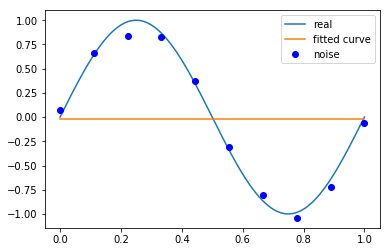

In [6]:
#M=0
p_lsq_0 = fitting(M=0)

Fitting Parameters: [-1.410619    0.68945936]


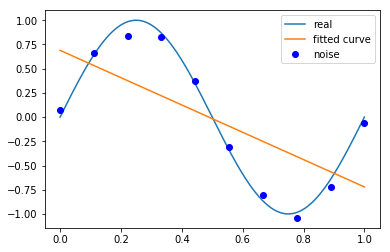

In [7]:
#M=1
p_lsq_1 = fitting(M=1)

Fitting Parameters: [ 1.96047948e+01 -2.94720762e+01  9.81205573e+00  2.15023350e-03]


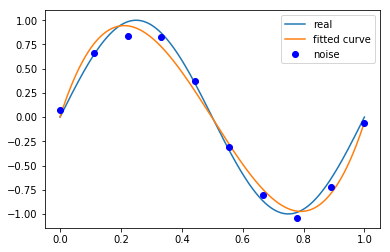

In [8]:
#M=3
p_lsq_3 = fitting(M=3)

Fitting Parameters: [-4.96240445e+03  2.05924097e+04 -3.50144884e+04  3.12544552e+04
 -1.55293934e+04  4.17315859e+03 -5.23217981e+02  1.54168431e+00
  7.80549115e+00  6.94618093e-02]


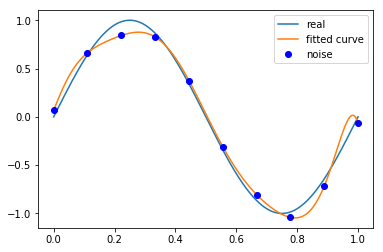

In [9]:
#M=9
p_lsq_9 = fitting(M=9)

当M=9时，该模型过拟合了，所以得引入正则化项，降低过拟合

正则化式结构风险最小化策略的实现，是在经验风险上加一个正则化项或罚项。

正则化一般是模型复杂度的单调递增函数，模型越复杂，正则化值就越大。

回归问题中，损失函数是平方损失。

.L1: regularization*abs(p)

.L2: 0.5 * regularization * np.square(p)

## 正则化 ##

In [10]:
regularization = 0.0001

def residuals_func_regularization(p, x, y):
    ret = fit_func(p, x) - y
    ret = np.append(ret, np.sqrt(0.5 * regularization * np.square(p)))   #L2范数
    return ret

In [11]:
#最小二乘法,加正则化项
p_init = np.random.rand(9+1)
p_lsq_regularization = leastsq(residuals_func_regularization, p_init, args=(x,y))

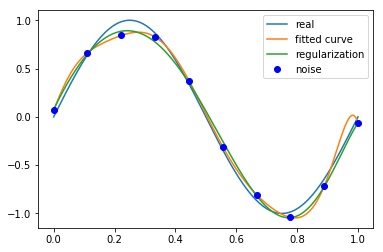

In [13]:
plt.plot(x_points, real_func(x_points), label = 'real')
plt.plot(x_points, fit_func(p_lsq_9[0], x_points), label = 'fitted curve')
plt.plot(x_points, fit_func(p_lsq_regularization[0], x_points), label = 'regularization')
plt.plot(x,y,'bo',label='noise')
plt.legend()